<a href="https://colab.research.google.com/github/kcast03/DataScienceCustomerPersonalityAnalysis/blob/main/notebook_secondDeliverable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install numpy pandas matplotlib.pyplot seaborn  --upgrade --quite

#!pip install plotly --upgrade

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler

%matplotlib inline

In [ ]:
# Import the dataset
df = pd.read_csv("/content/marketing_campaign.csv", sep="\t")

In [ ]:
print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...            

# Data Cleaning

In [ ]:
# Check for missing data
print("Missing data in the dataframe:")
print(df.isnull().sum())

Missing data in the dataframe:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


<Axes: >

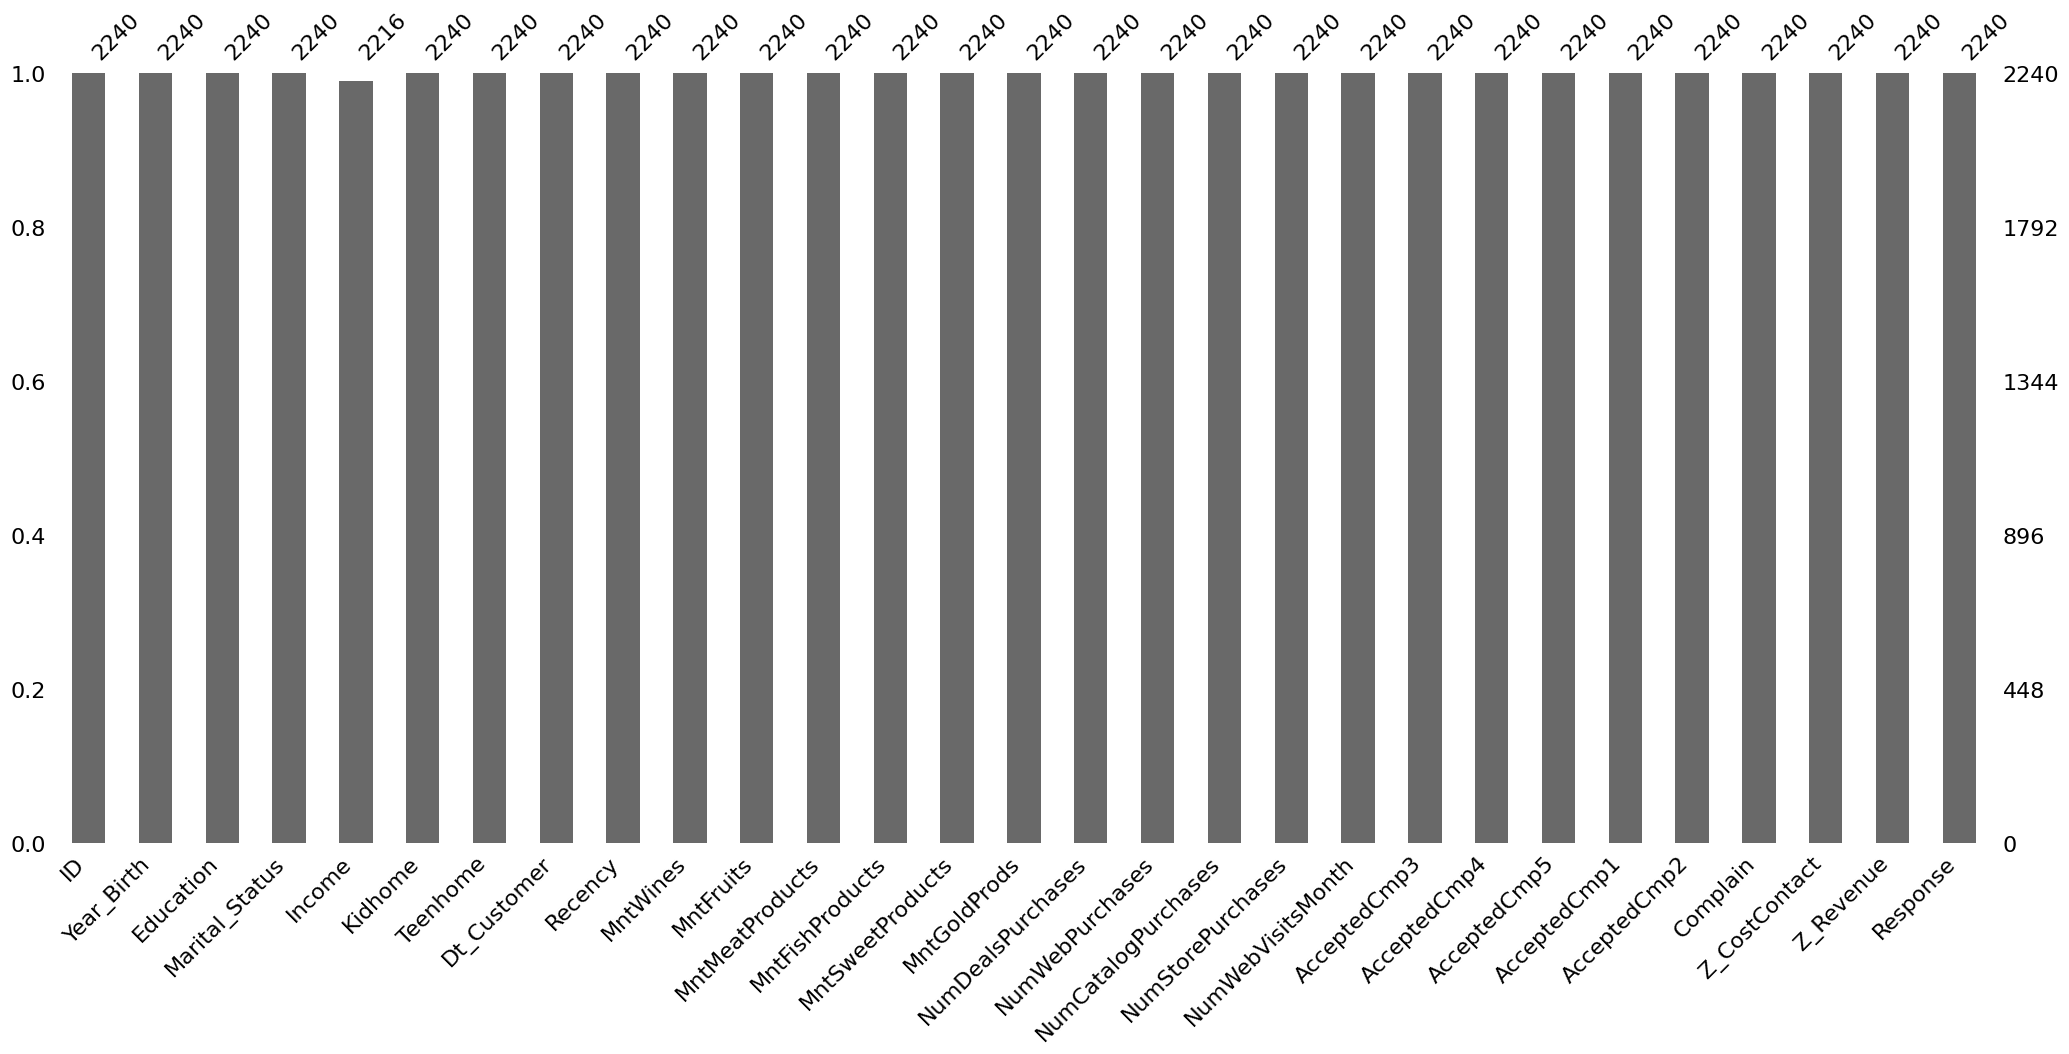

In [ ]:
# Visualize missing data

msno.bar(df)

In [ ]:
# Delete all rows with NA values of income
df = df.dropna()

Since there is only missing data in one attribute and it only contributes to less than 2% of the data, it is best to drop the values and keep accurate data.

In [ ]:
# Checking for duplicate values
df.duplicated().sum()

0

In [ ]:
# Detect outliers

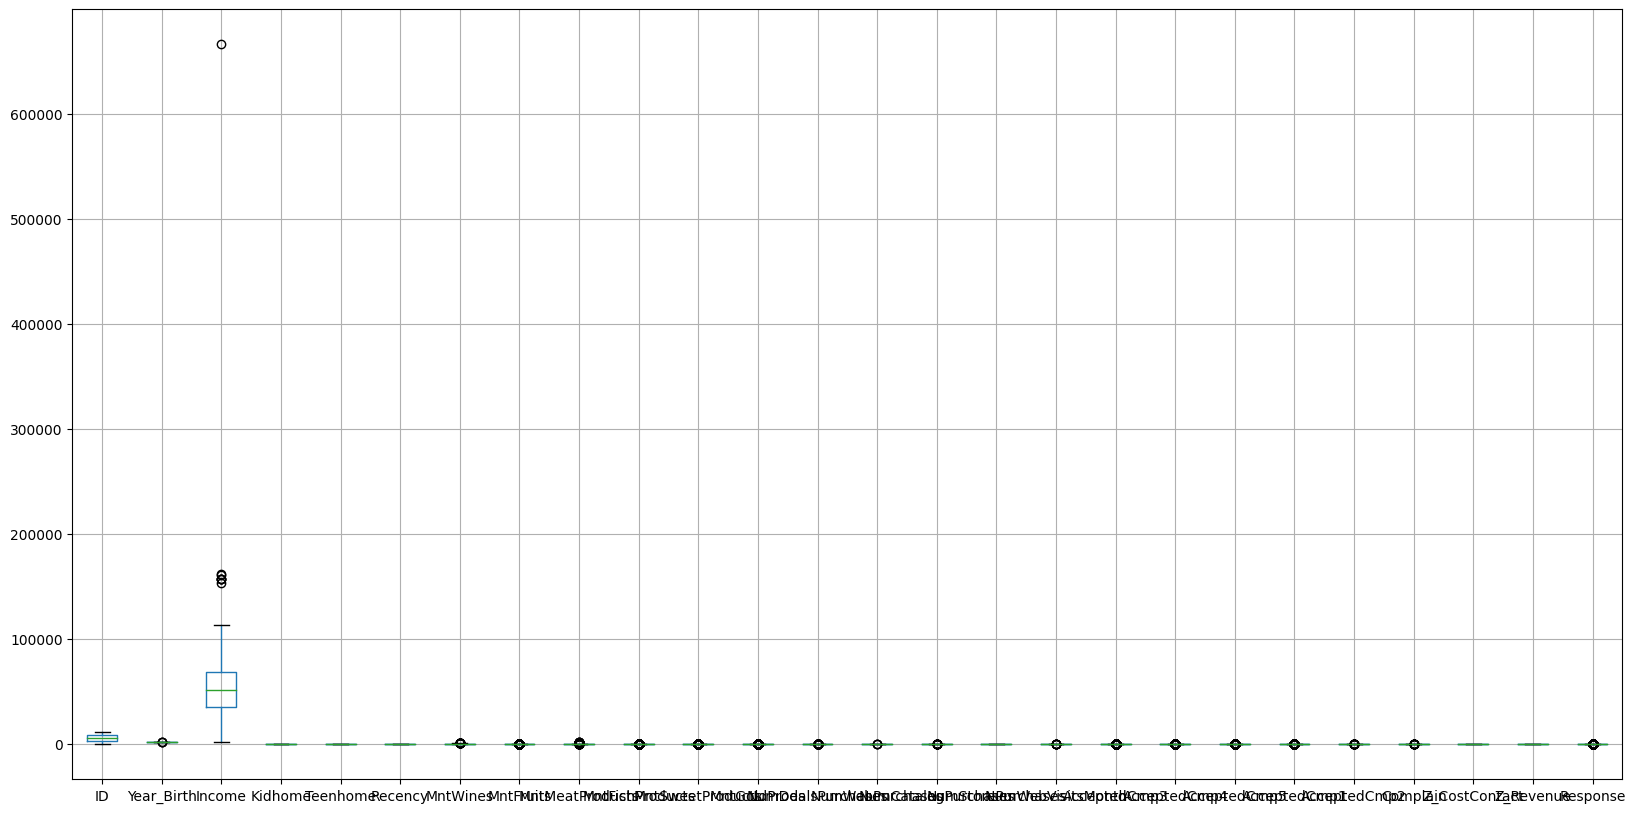

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

df.boxplot()
plt.show()

 From here we can see income is the column with most outliers

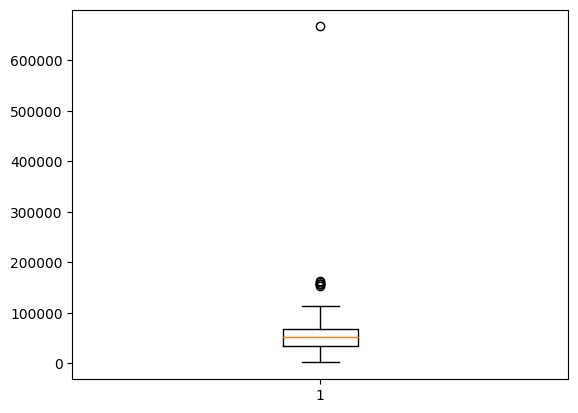

In [ ]:
# Visualize the outliers from income column
plt.boxplot(df['Income'])
plt.show()

In [ ]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

Here we can see that the max value of income is way higher than the 75th percentile. This is our outlier that could mess with our model later on so it is best to delete it.


In [ ]:
df.drop(df.index[df['Income'] == df['Income'].max()], inplace = True)

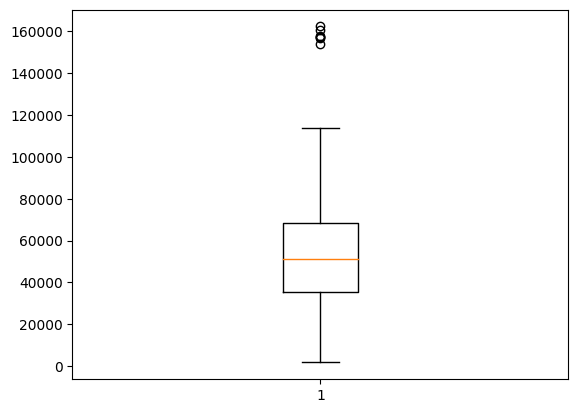

In [ ]:
# Visualize the Income column to see if we deleted outliers
plt.boxplot(df['Income'])
plt.show()

In [ ]:
# Remove unnecessary data
num_rows = len(df)

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Z_CostContact: 100.00%
3    2215
Name: Z_CostContact, dtype: int64

Z_Revenue: 100.00%
11    2215
Name: Z_Revenue, dtype: int64



In [ ]:
# Drop columns with similar data
df = df.drop(['Z_CostContact','Z_Revenue'], axis = 1)

# Data Feature Engineering


<Axes: >

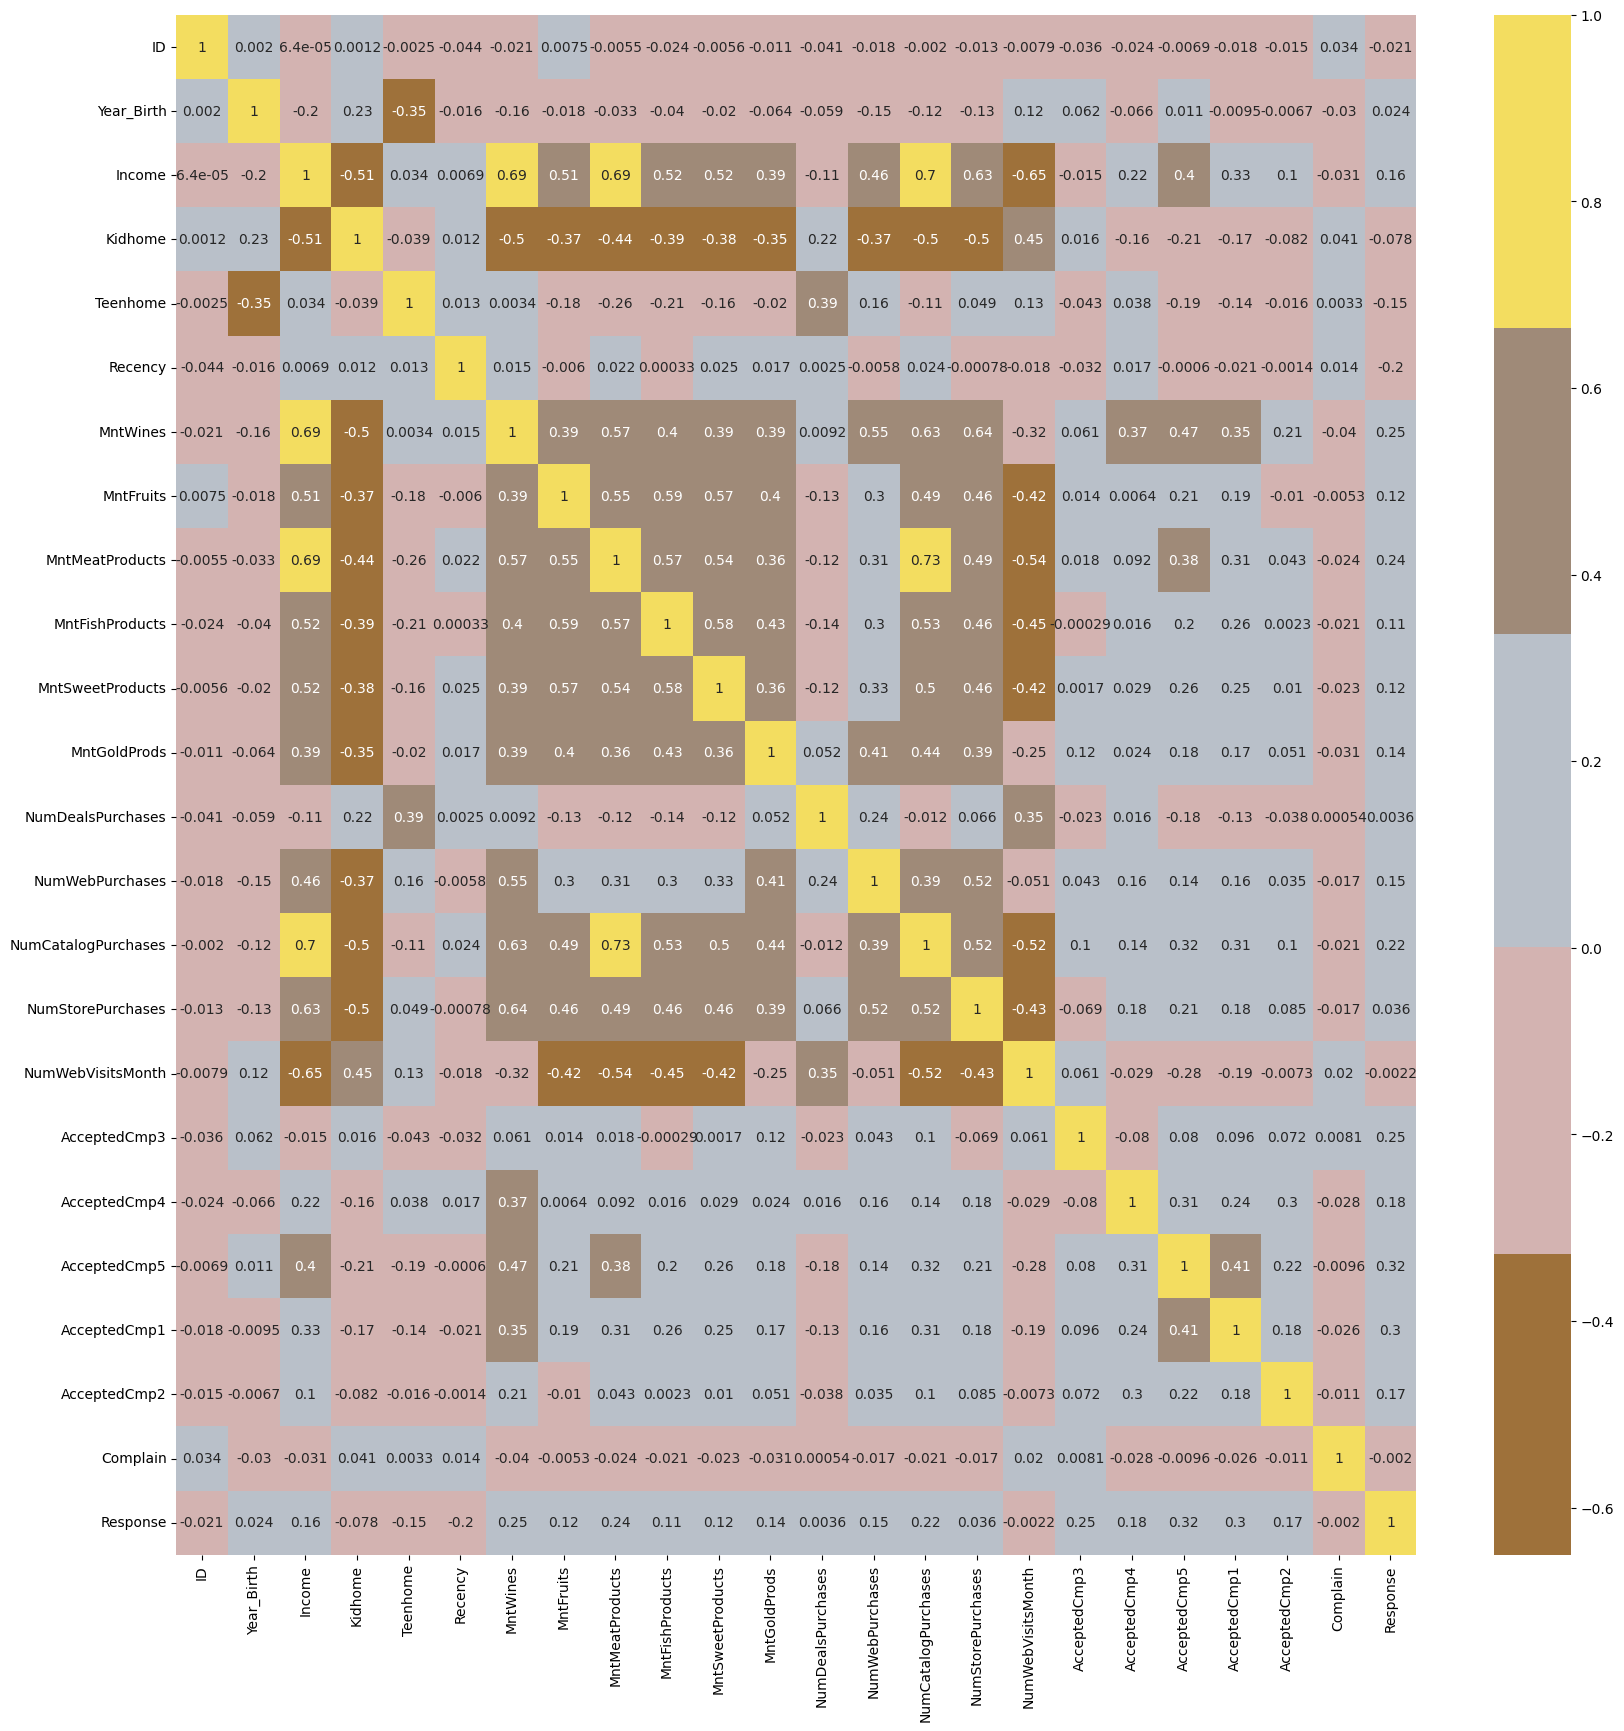

In [ ]:
pallet = ["#682F33", "#9E713A", "#D3B3B1", "#B9C0C9", "#9F8A78", "#F3DD60"]
cmap = colors.ListedColormap(pallet)
cm_plot = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cm_plot, annot=True, cmap =cmap, center=0)

In [ ]:
# Calculate the age from date of birth column

import datetime

today = datetime.date.today()

df['Age'] = today.year - df['Year_Birth']

df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,4,7,0,0,0,0,0,0,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,5,0,0,0,0,0,0,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,10,4,0,0,0,0,0,0,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,4,6,0,0,0,0,0,0,0,39
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,6,5,0,0,0,0,0,0,0,42


In [ ]:
# Calculate how long the customers have been with the company

import datetime
today = datetime.date.today()

df['Dt_Customer'] =  pd.DatetimeIndex(df['Dt_Customer']).year


df['enrollment_Years'] = today.year - df['Dt_Customer']

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr

In [ ]:
# Combine the total number of times when the customer accepted the offer in the all campaigns.

df['NumAccepted_1st_fiveCamps'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

# Count total number of kids and teenagers as Children
df['Children'] = df['Kidhome']+df['Teenhome']

# Calculate average spent on all different products
df['Ave_Spend_on_products']= df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']/6

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         2215 non-null   int64  
 1   Year_Birth                 2215 non-null   int64  
 2   Education                  2215 non-null   object 
 3   Marital_Status             2215 non-null   object 
 4   Income                     2215 non-null   float64
 5   Kidhome                    2215 non-null   int64  
 6   Teenhome                   2215 non-null   int64  
 7   Dt_Customer                2215 non-null   int64  
 8   Recency                    2215 non-null   int64  
 9   MntWines                   2215 non-null   int64  
 10  MntFruits                  2215 non-null   int64  
 11  MntMeatProducts            2215 non-null   int64  
 12  MntFishProducts            2215 non-null   int64  
 13  MntSweetProducts           2215 non-null   int64

In [ ]:
# Classify marital_status into 2 main categories: partner and single
df.Marital_Status = df.Marital_Status.replace({'Together': 'Partner',
                                               'Married': 'Partner',
                                               'Divorced': 'Single',
                                               'Widow': 'Single',
                                               'Alone': 'Single',
                                               'Absurd': 'Single',
                                               'YOLO': 'Single'})

<function matplotlib.pyplot.show(close=None, block=None)>

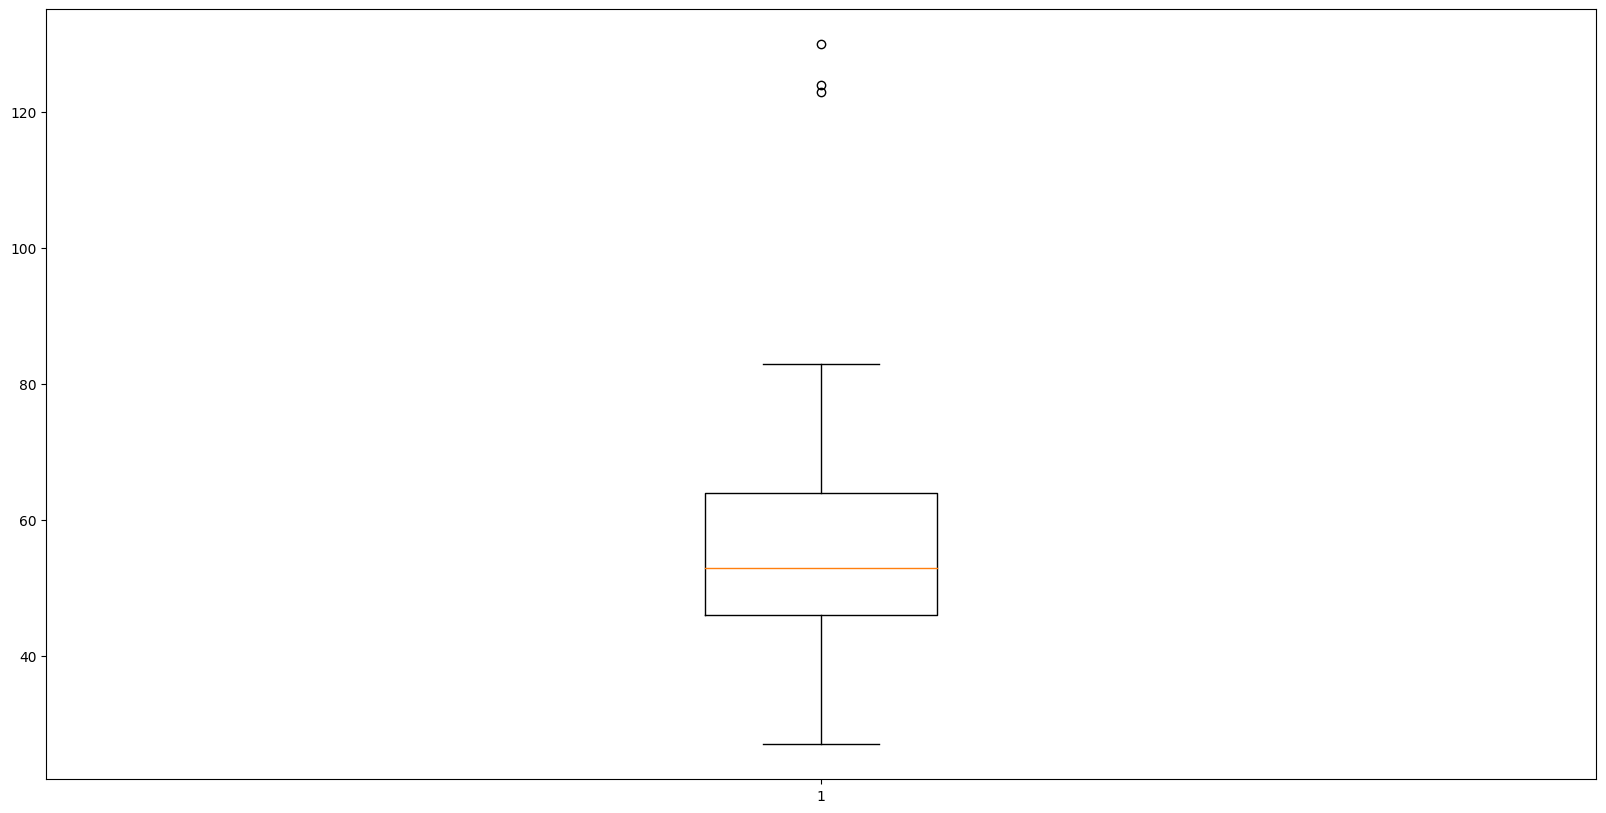

In [ ]:
# Visualize the Age column
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
plt.boxplot(df['Age'])
plt.show

In [ ]:
df['Age'].describe()

count    2215.000000
mean       54.183296
std        11.987000
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

In [ ]:
# Remove outlier in age columns (those with age greater than 80s)
df.drop(df.index[df['Age'] >80], inplace = True)

<function matplotlib.pyplot.show(close=None, block=None)>

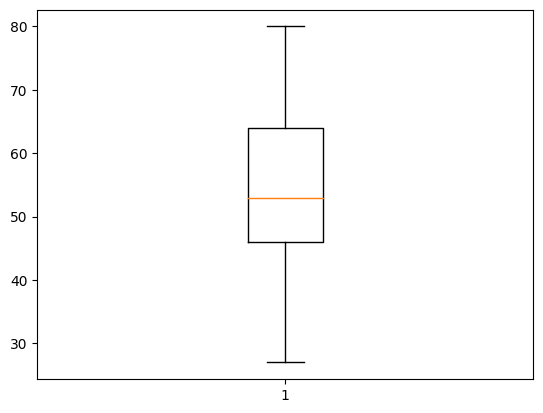

In [ ]:
plt.boxplot(df['Age'])
plt.show

In [ ]:
# Categorize Age into different age groups
df.loc[(df['Age'] >= 13) & (df['Age'] <= 19), 'AgeGroup'] = 'Teen'
df.loc[(df['Age'] >= 20) & (df['Age']<= 39), 'AgeGroup'] = 'Adult'
df.loc[(df['Age'] >= 40) & (df['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
df.loc[(df['Age'] > 60), 'AgeGroup'] = 'Senior Adult'

In [ ]:
# Display unique values in 2 columns: Education and marital_status
print("Unique values in Education column:", df['Education'].unique())
print("Unique values in Marital_Status column:", df['Marital_Status'].unique())

Unique values in Education column: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique values in Marital_Status column: ['Single' 'Partner']


In [ ]:
df ['Education'] = df['Education'].map({'Graduation': 'Graduated', 'PhD': 'Postgraduated', 'Master': 'Postgraduated', '2n Cycle': 'Pregraduated', 'Basic': 'Pregraduated'})

In [ ]:
# Identify to be drop columns
df = df.drop(['Year_Birth','Dt_Customer','ID','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'Kidhome', 'Teenhome', 'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts', 'MntGoldProds', 'Age', 'Complain'], axis =1)

In [ ]:
# Convert categorical columns to numeric columns
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Education', 'Marital_Status', 'AgeGroup']

encoder = LabelEncoder()

df[categorical_cols] = df[categorical_cols].apply(lambda col: encoder.fit_transform(col))
df[categorical_cols].head(10)

,Education,Marital_Status,AgeGroup
0,0,1,2
1,0,1,2
2,0,0,1
3,0,0,0
4,1,0,1
5,1,0,1
6,0,1,1
7,1,0,0
8,1,0,1
9,1,0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2210 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  2210 non-null   int64  
 1   Marital_Status             2210 non-null   int64  
 2   Income                     2210 non-null   float64
 3   Recency                    2210 non-null   int64  
 4   NumDealsPurchases          2210 non-null   int64  
 5   NumWebPurchases            2210 non-null   int64  
 6   NumCatalogPurchases        2210 non-null   int64  
 7   NumStorePurchases          2210 non-null   int64  
 8   NumWebVisitsMonth          2210 non-null   int64  
 9   Response                   2210 non-null   int64  
 10  enrollment_Years           2210 non-null   int64  
 11  NumAccepted_1st_fiveCamps  2210 non-null   int64  
 12  Children                   2210 non-null   int64  
 13  Ave_Spend_on_products      2210 non-null   float

<Axes: >

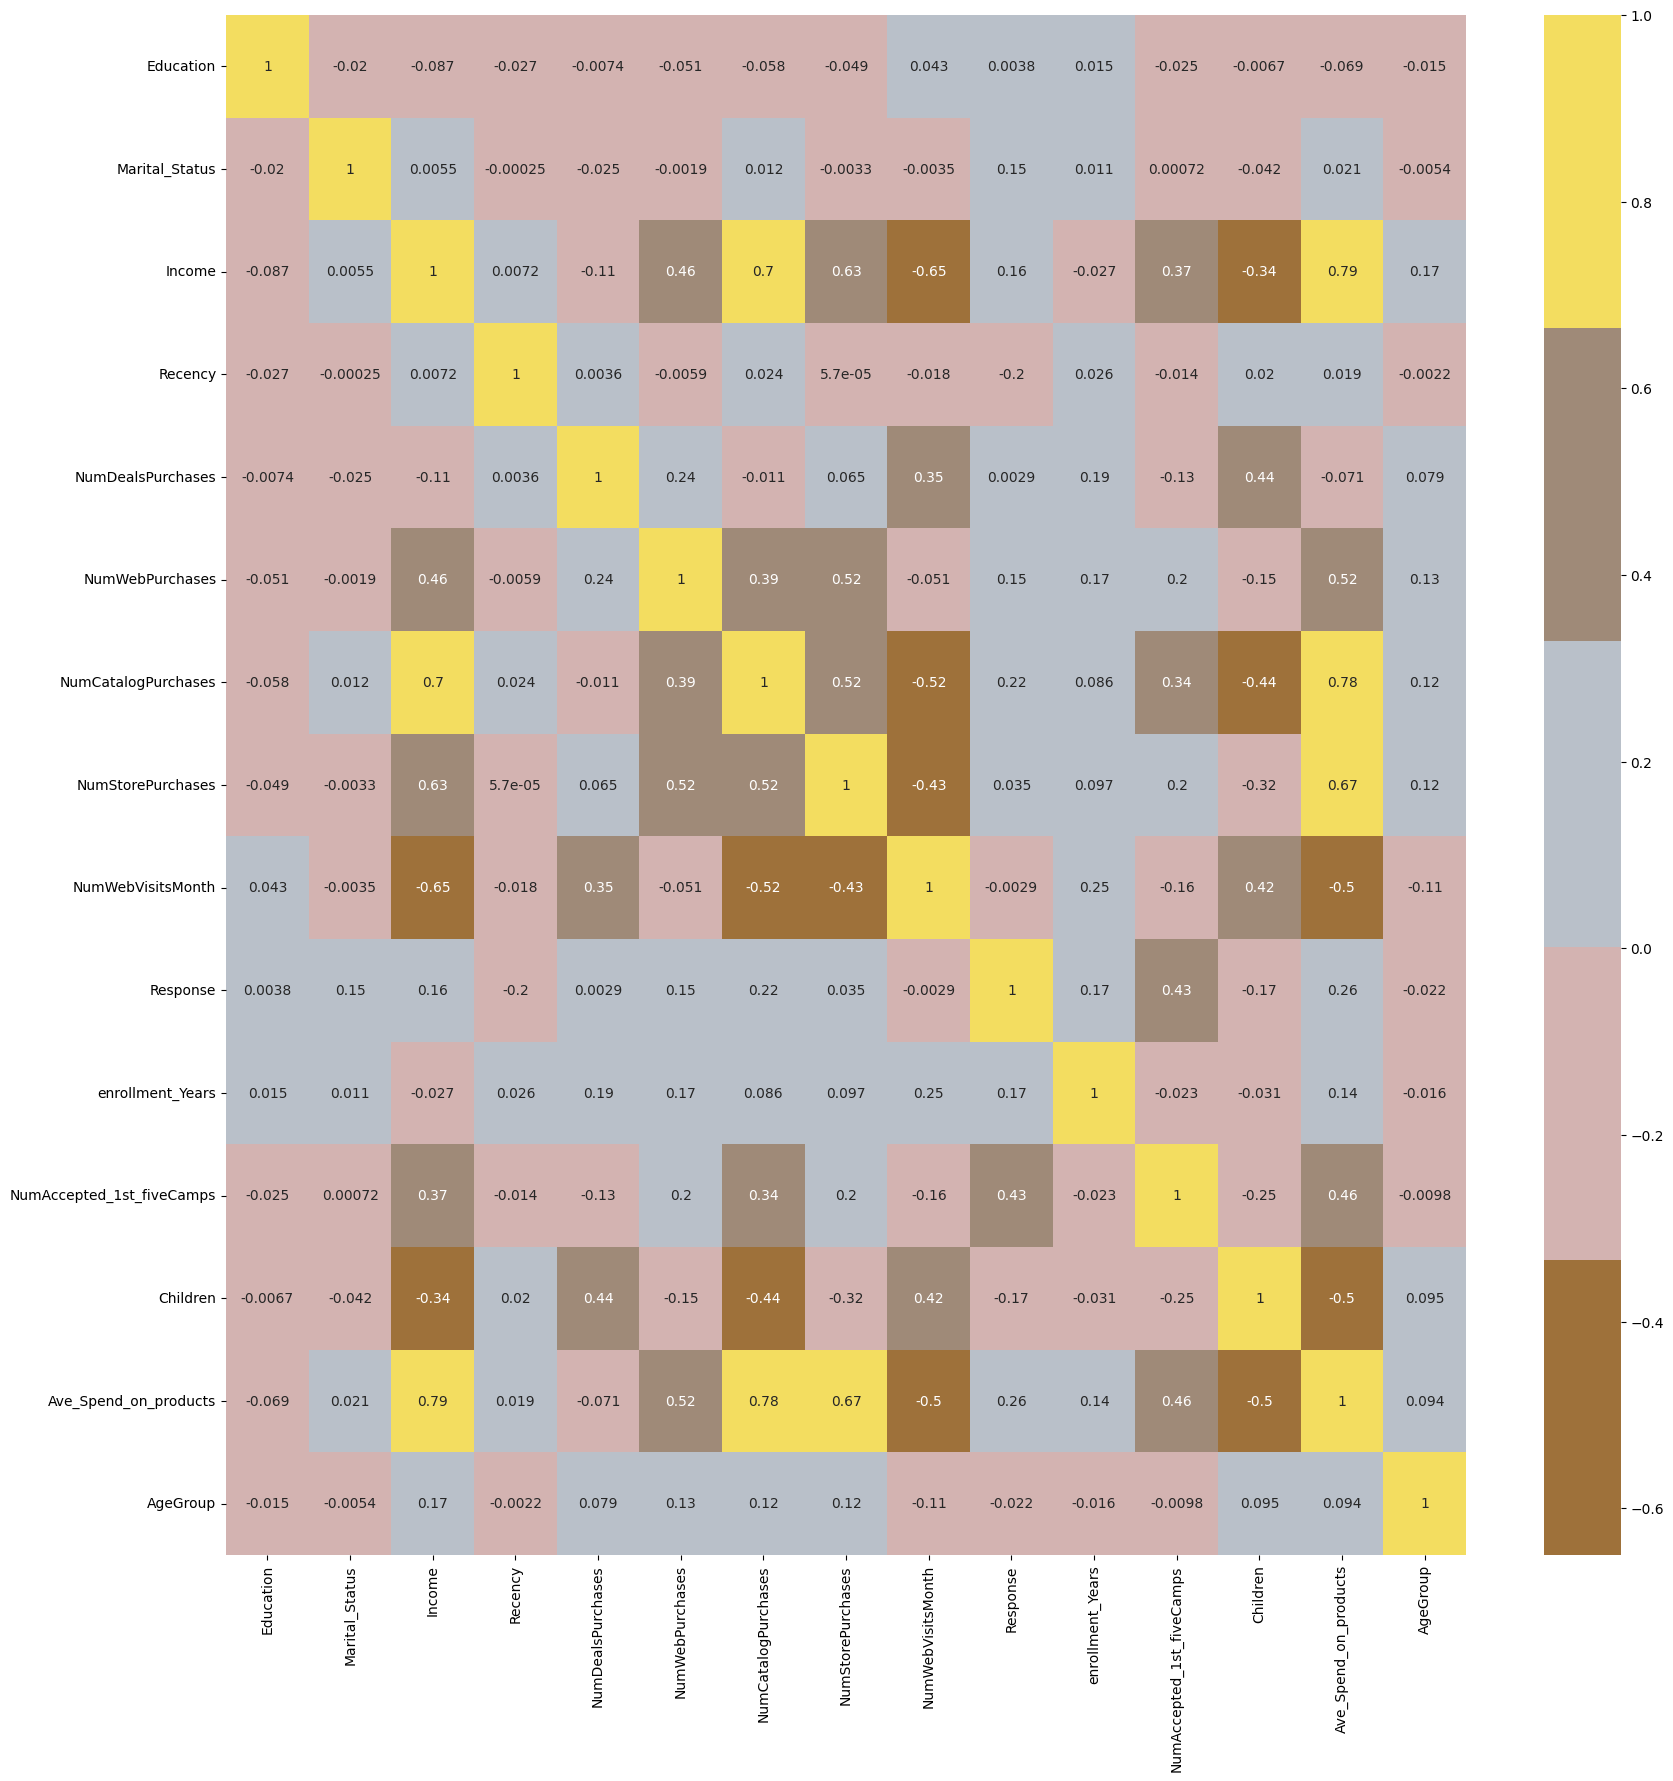

In [ ]:
pallet = ["#682F33", "#9E713A", "#D3B3B1", "#B9C0C9", "#9F8A78", "#F3DD60"]
cmap = colors.ListedColormap(pallet)
cm_plot = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cm_plot, annot=True, cmap =cmap, center=0)

# Exploratory Data Analysis

In [ ]:
# Marital Status
maritalstatus = df.Marital_Status.value_counts()

fig = px.pie(maritalstatus,
             values = maritalstatus.values,
             names = maritalstatus.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

the pie chart above shows that 64.6% are having partners(1) while 35.4% are single(0)

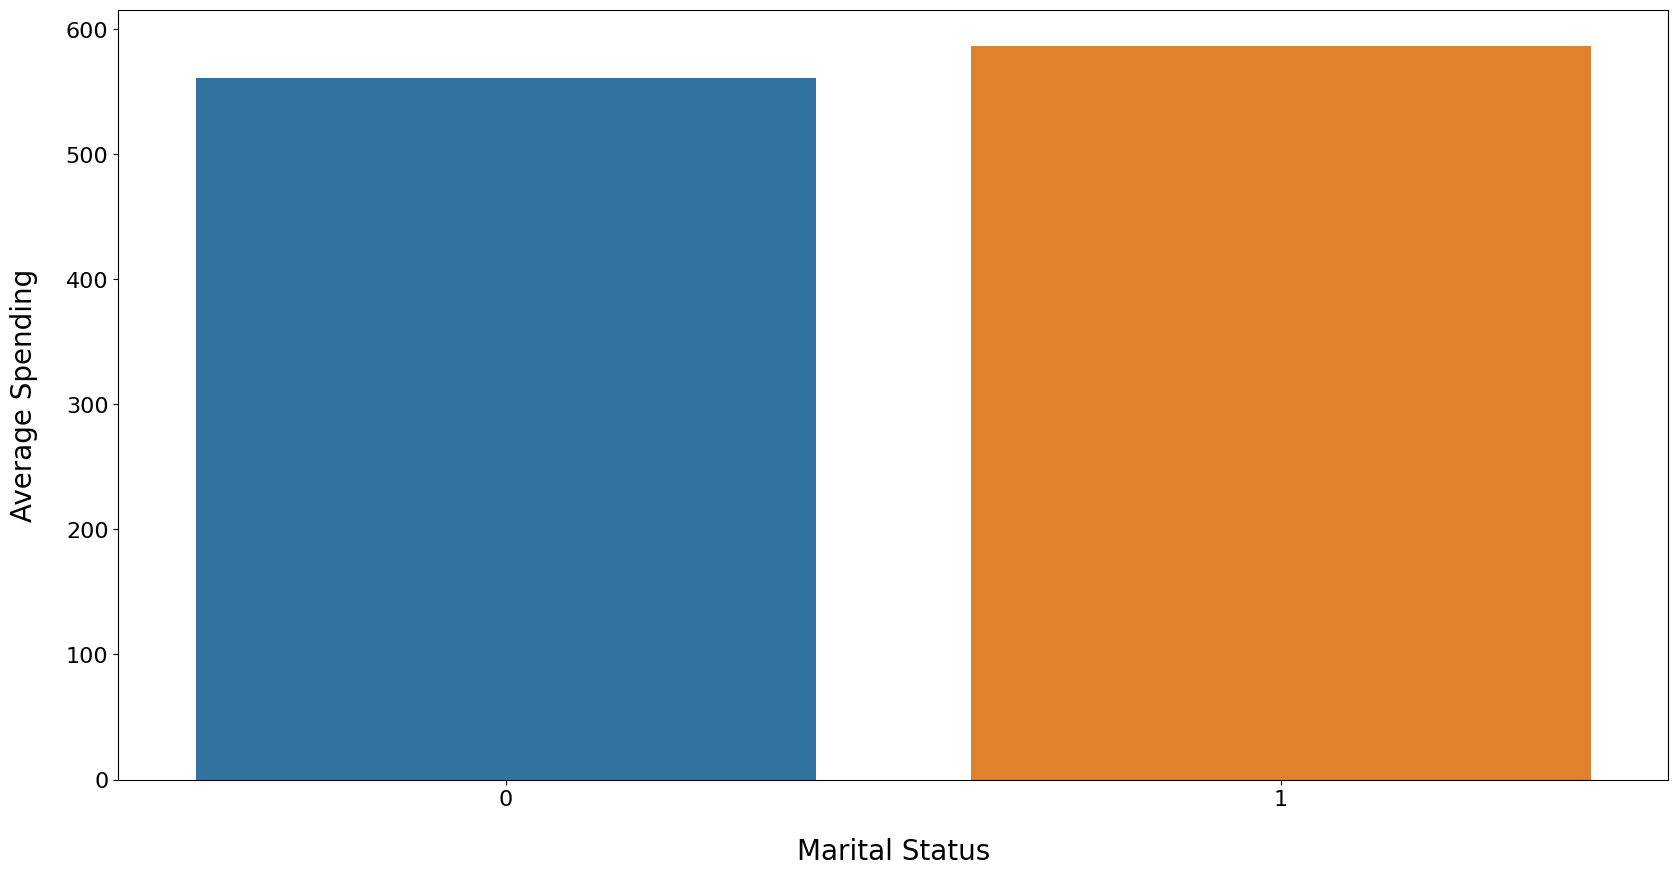

In [ ]:
# Average spending : Marital Status
maritalspending = df.groupby('Marital_Status')['Ave_Spend_on_products'].mean().sort_values(ascending=False)
maritalspending_df = pd.DataFrame(list(maritalspending.items()), columns=['Marital Status', 'Average Spending'])

plt.figure(figsize=(20,10))
sns.barplot(data = maritalspending_df, x="Marital Status", y="Average Spending");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Marital Status', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);


The average spending of single people (0) is slightly lower than the average spending of not single people.

In [ ]:
# Education level
education = df.Education.value_counts()

fig = px.pie(education,
             values = education.values,
             names = education.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()


0 (graduate stud): 50.5 %
1(post grad ): 38.1%
2 (under grad) : 11.4%
Almost half of all customers have achieved a college degree. Only 11.4% of customers consist of people in college or without a college degree.


In [ ]:
# child status
children = df.Children.value_counts()

fig = px.pie(children,
             values = children.values,
             names = children.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

About 50% of customers have 1 child
28.5% = 0 child
18.8% = 2 children
2.26% = 3 children

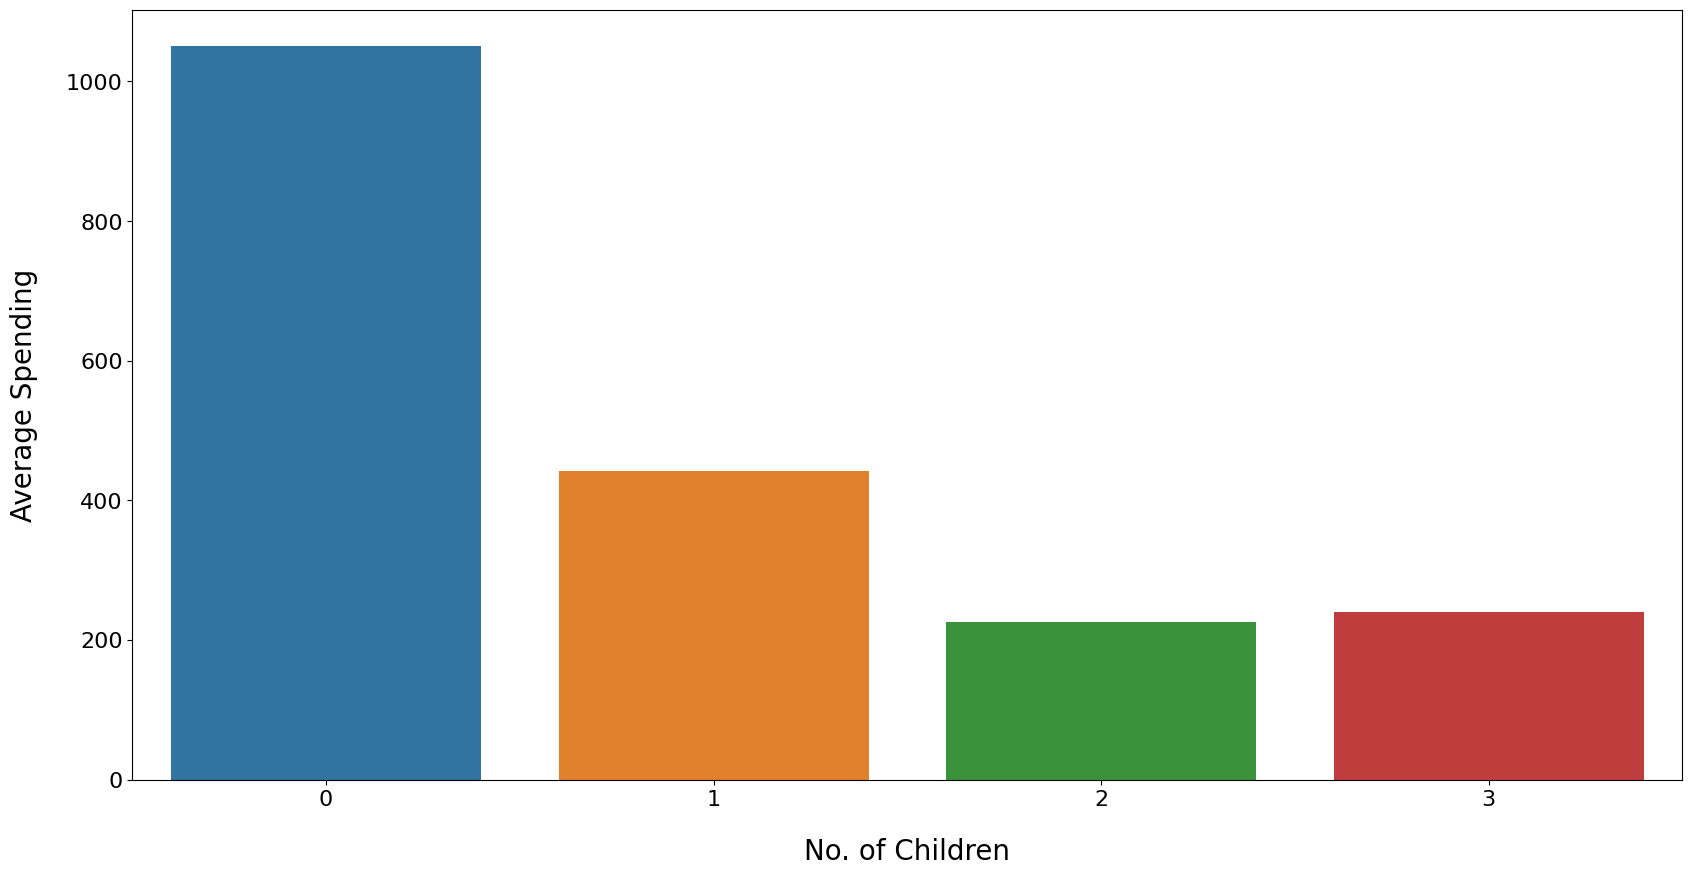

In [ ]:
childrenspending = df.groupby('Children')['Ave_Spend_on_products'].mean().sort_values(ascending=False)
childrenspending_df = pd.DataFrame(list(childrenspending.items()), columns=['No. of Children', 'Average Spending'])

plt.figure(figsize=(20,10))

sns.barplot(data=childrenspending_df,  x="No. of Children", y="Average Spending");
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Children', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

People with no children are more likely to spend more money than people with 1, 2 or 3 children.

In [ ]:
# categorize into age group
agegroup = df.AgeGroup.value_counts()

fig = px.pie(labels = agegroup.index, values = agegroup.values, names = agegroup.index, width = 550, height = 550)

fig.update_traces(textposition = 'inside',
                  textinfo = 'percent + label',
                  hole = 0.75,
                  marker = dict(colors = ['#3D0C02', '#800000'  , '#C11B17','#C0C0C0'],
                                line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'Age Groups',
                                      x = 0.5, y = 0.5, font_size = 36, showarrow = False,
                                      font_color = 'black')],
                  showlegend = False)

fig.show()

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



The majority of customers consist of middle age to senior adults. More than 50% of customers are middle age adults.

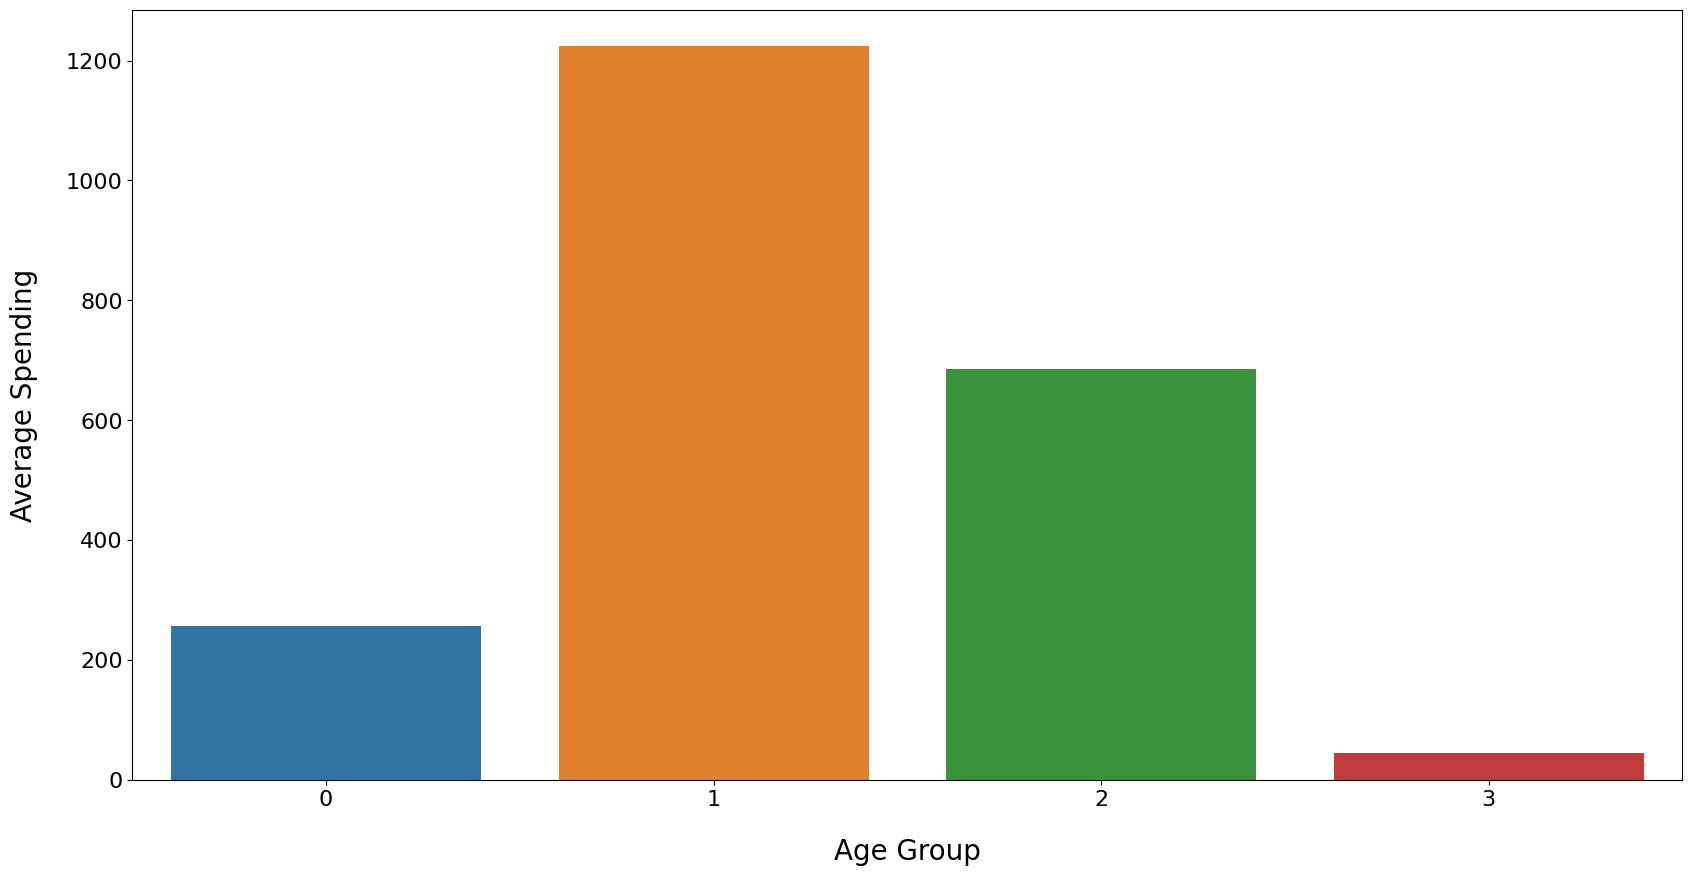

In [ ]:
# Average Spendings vs Age group
agegroupspending = df.groupby('AgeGroup')['Ave_Spend_on_products'].mean().sort_values(ascending=False)
agegroupspending_df = pd.DataFrame(list(agegroup.items()), columns=['Age Group', 'Average Spending'])

plt.figure(figsize=(20,10))

sns.barplot(data = agegroupspending_df, x="Age Group", y='Average Spending');
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age Group', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

Most average spending comes from the middle age and senior adults and followed by younger people or teens. The highest average spending is above 1200.

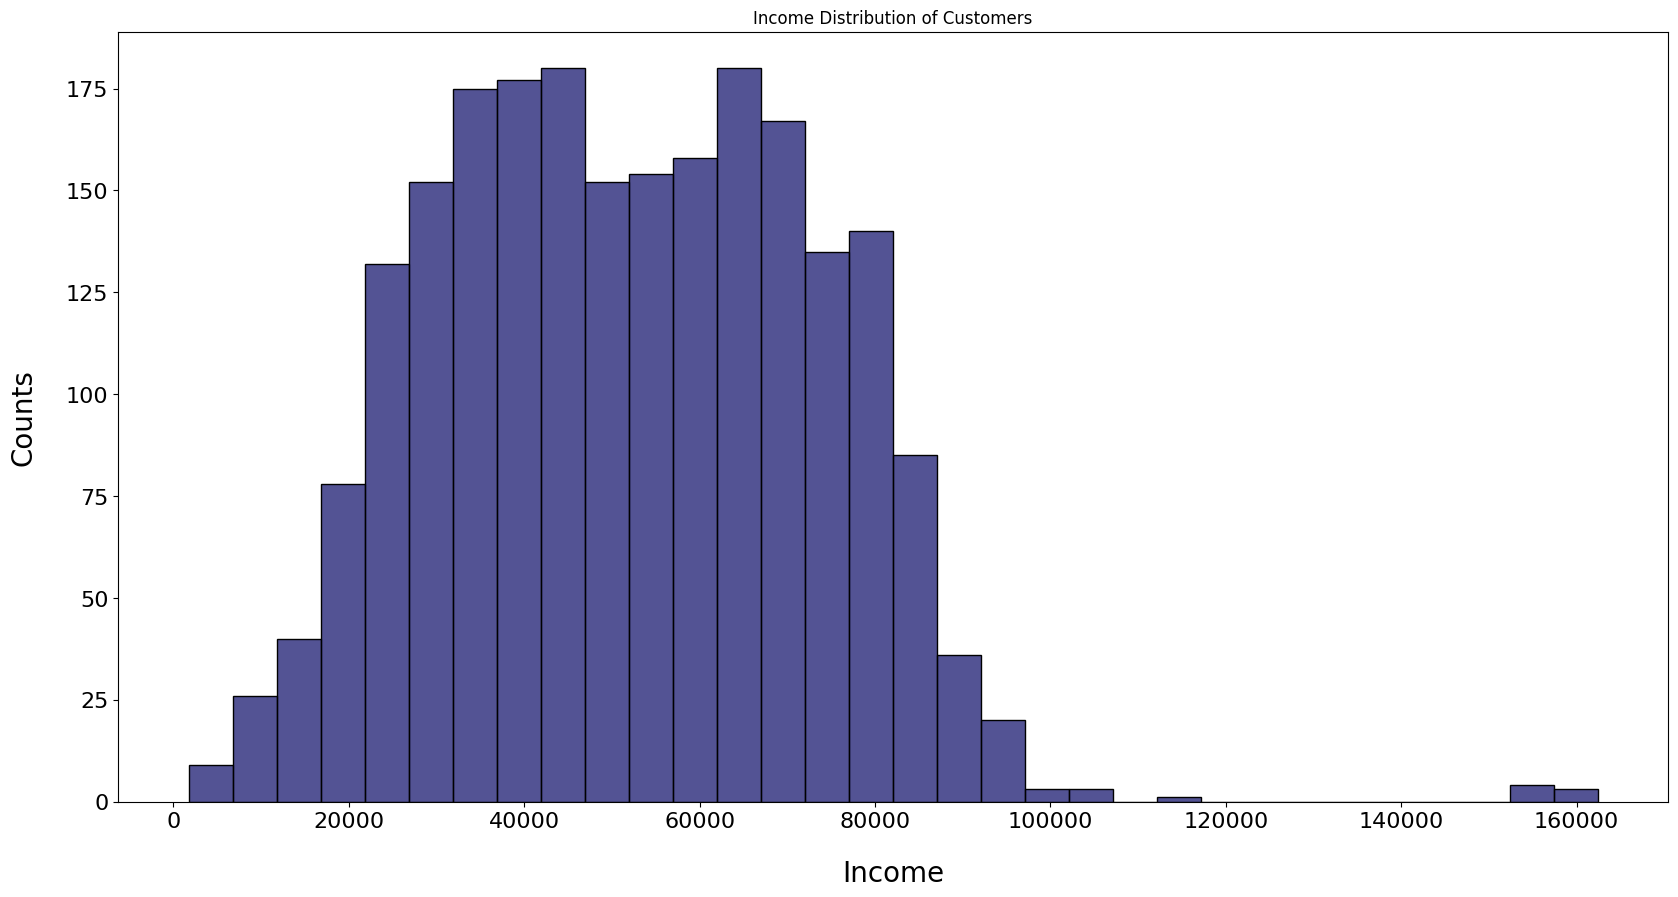

In [ ]:
# Income Distribution of Customer
plt.figure(figsize=(20, 10))
ax = sns.histplot(data = df.Income, color = "midnightblue")
ax.set(title = "Income Distribution of Customers");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20);

there are outliers but the distibution with most most customers earinig between 25000 and 85000

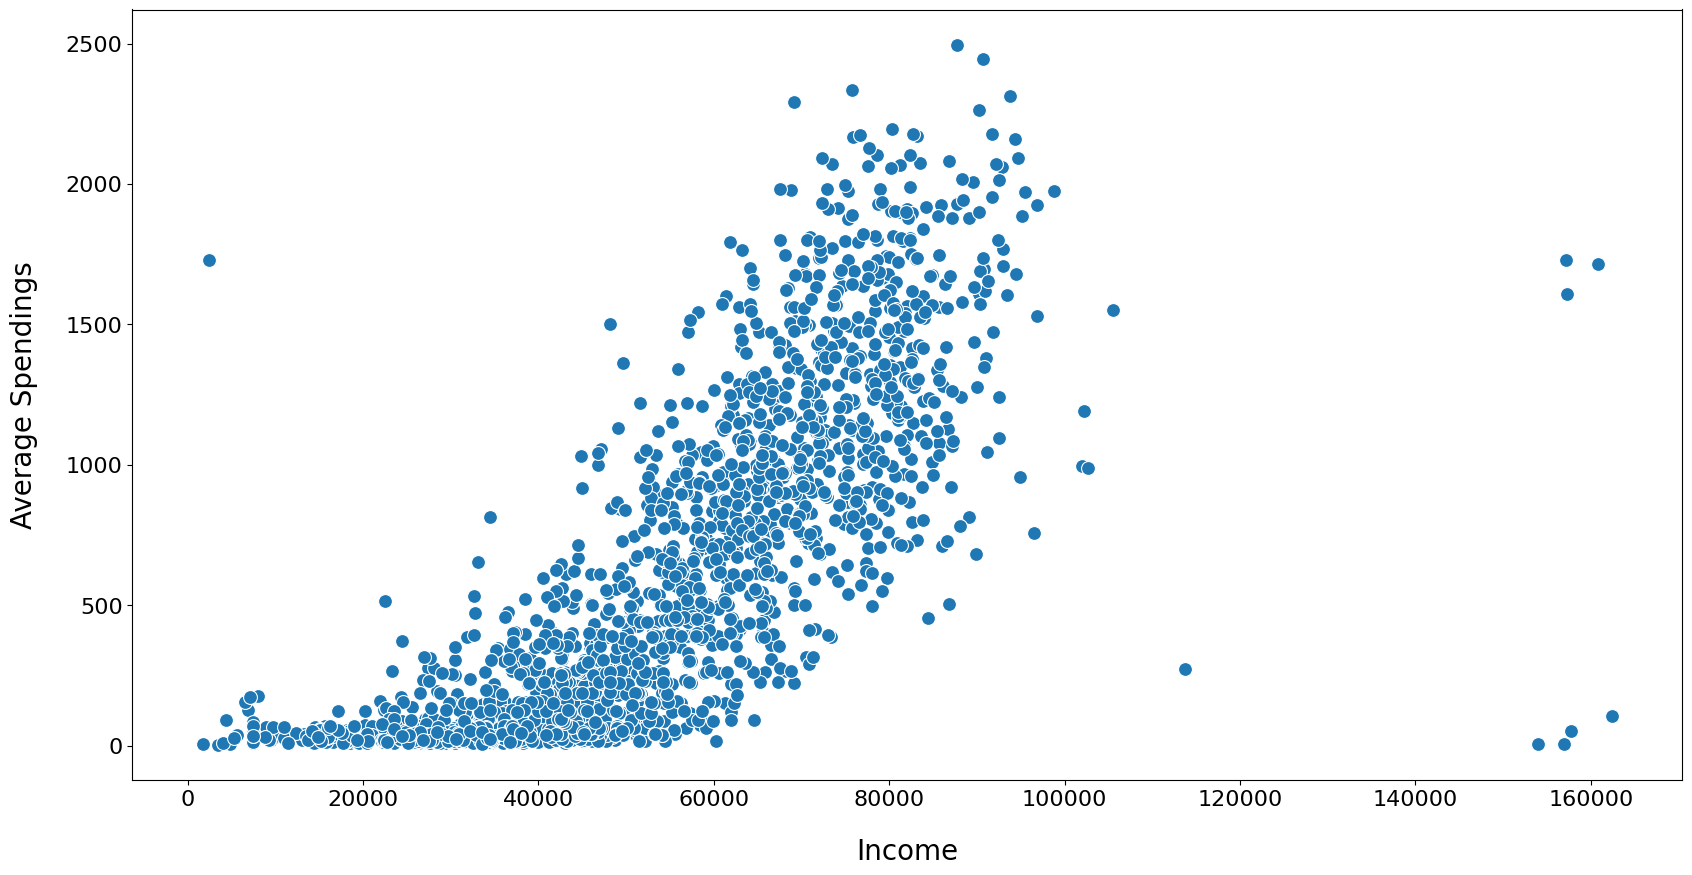

In [ ]:
# Income vs Spendings
plt.figure(figsize=(20,10))

sns.scatterplot(x= df.Income, y= df.Ave_Spend_on_products, s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Average Spendings', fontsize=20, labelpad=20);

The relationship between the average spendings and income has a strong linear relationship which indication a postive correlation and the more income of the customers the more they tend to spend more money on the products in this company.

## **PCA**

In [ ]:
data_scaled = df.copy()
scale_cols = ['Education', 'Marital_Status', 'Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'enrollment_Years', 'NumAccepted_1st_fiveCamps', 'Children', 'Ave_Spend_on_products','AgeGroup']

In [ ]:
# Perform data scaling using StandardScaler
ss = StandardScaler()
for col in scale_cols:
    data_scaled[col] = ss.fit_transform(data_scaled[[col]])
display(data_scaled.shape, data_scaled.head(3))

(2210, 15)

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,enrollment_Years,NumAccepted_1st_fiveCamps,Children,Ave_Spend_on_products,AgeGroup
0,-0.892797,1.349992,0.288058,0.311636,0.350167,1.426935,2.507090,-0.555973,0.691484,1,1.498446,-0.438818,-1.266087,1.678154,1.140922
1,-0.892797,1.349992,-0.260133,-0.379777,-0.169557,-1.125937,-0.571059,-1.171092,-0.133222,0,-1.416665,-0.438818,1.403810,-0.944931,1.140922
2,-0.892797,-0.740745,0.914383,-0.794624,-0.689280,1.426935,-0.229043,1.289385,-0.545575,0,0.040891,-0.438818,-1.266087,0.294498,-0.347530


In [ ]:
# Fit the standardized data using PCA
from sklearn.decomposition import PCA
variance_ratio = {}
for i in range(1, len(data_scaled.columns)+1):
    pca = PCA(n_components=i)
    pca.fit(data_scaled)
    variance_ratio[f'n_{i}'] = pca.explained_variance_ratio_.sum()

In [ ]:
 # PCA variance ratio
 pca.explained_variance_ratio_

array([0.30371001, 0.1241886 , 0.08369756, 0.07307934, 0.07127282,
       0.06883632, 0.06194336, 0.05856935, 0.04386508, 0.033698  ,
       0.028323  , 0.01902277, 0.01440584, 0.00938515, 0.0060028 ])

In [ ]:
variance_ratio

{'n_1': 0.3037100088539467,
 'n_2': 0.42789861211516933,
 'n_3': 0.5115961536076618,
 'n_4': 0.5846755154364083,
 'n_5': 0.655948330992187,
 'n_6': 0.7247846539636218,
 'n_7': 0.786728009898226,
 'n_8': 0.8452973648880602,
 'n_9': 0.8891624411106903,
 'n_10': 0.9228604385082781,
 'n_11': 0.9511834398936828,
 'n_12': 0.9702062053986277,
 'n_13': 0.9846120433591893,
 'n_14': 0.993997197422802,
 'n_15': 1.0}

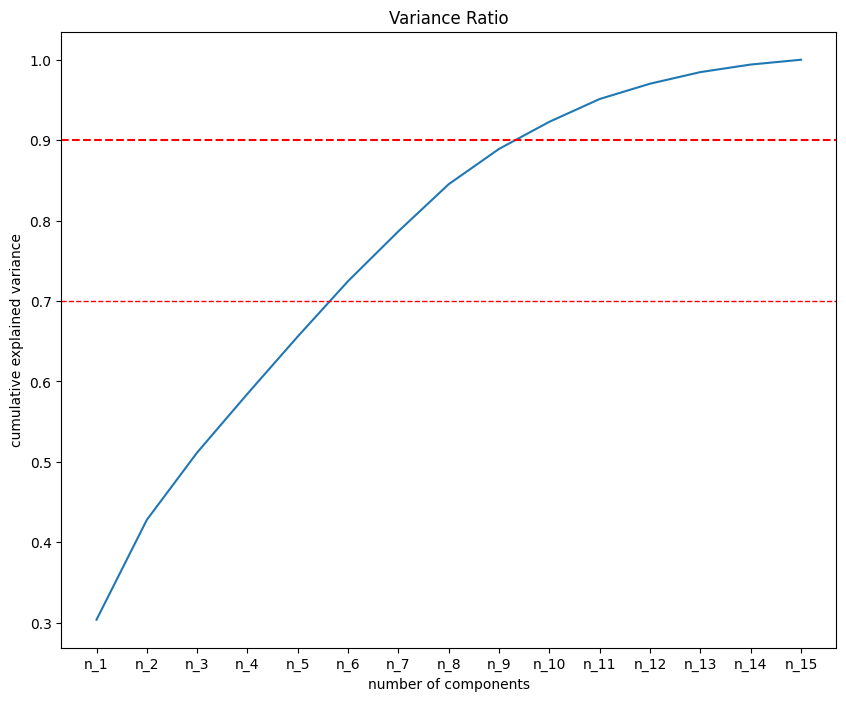

In [ ]:
plt.figure(figsize = (10,8))

plt.plot(variance_ratio.keys(), variance_ratio.values())
plt.axhline(0.7, color = 'red', ls = '--', lw = 1)
plt.axhline(0.9, color = 'red', ls = '--', lw = 1.5)
plt.title("Variance Ratio")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

The graph shows the amount of variance depending on the number of components. Here, we want to preserve around 80 % of the variance. So, in this case, we decide to keep 8 components.

In [ ]:
# Eigenvector per each PC - From the graph choose 8 principal components
data_pca8 = pd.DataFrame(pca.components_[0:8],
                         columns=data_scaled.columns,
                         index = ['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']).T
data_pca8

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Education,-0.042754,-0.035247,0.181034,0.587962,-0.241804,-0.700385,0.213413,-0.144075
Marital_Status,0.010016,-0.032283,0.159830,-0.372028,0.761849,-0.466697,0.126399,-0.127565
Income,0.426838,0.010450,-0.163219,0.006980,0.009013,0.000663,0.028183,-0.075923
Recency,0.004633,0.016924,-0.066807,-0.697666,-0.566077,-0.341327,0.240146,0.006522
NumDealsPurchases,-0.075046,0.608929,-0.121496,0.025519,0.020004,0.031697,0.132734,-0.306118
NumWebPurchases,0.265644,0.423867,0.037397,0.040318,0.028698,0.033707,0.034874,-0.142233
NumCatalogPurchases,0.402807,0.046753,0.013938,-0.015137,-0.026092,-0.027237,-0.004678,0.001320
NumStorePurchases,0.365630,0.181928,-0.063625,0.025246,-0.025715,-0.050422,-0.188721,-0.235827
NumWebVisitsMonth,-0.324128,0.344612,0.288323,0.003551,0.027930,0.090713,0.155861,0.143360
Response,0.041150,0.017735,0.103074,0.039477,0.087047,0.035117,0.096892,0.075738


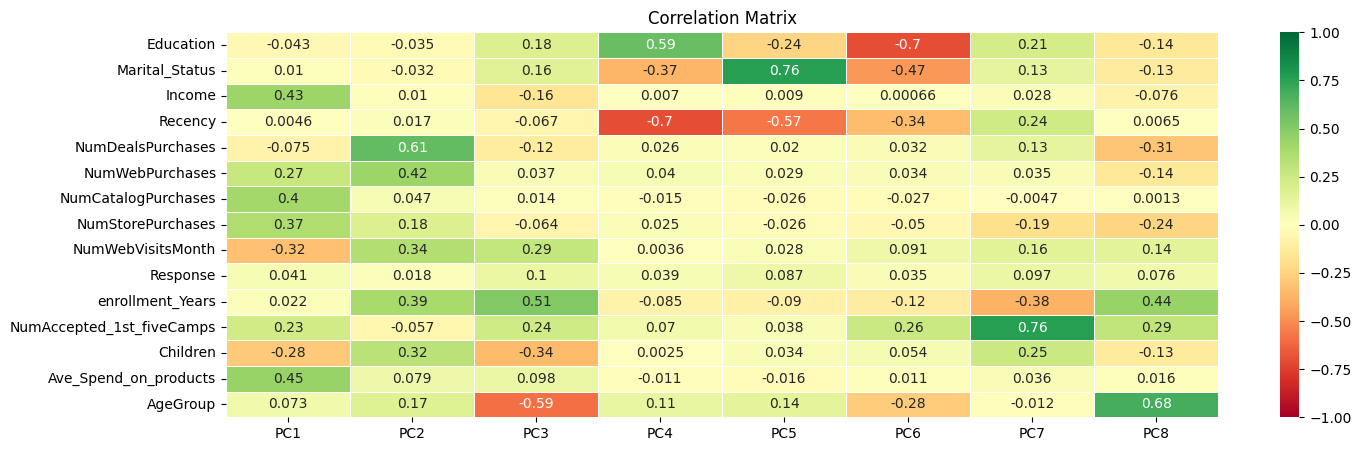

In [ ]:
# Plot the correlation matrix
import seaborn as sns
plt.figure(figsize = (16,5))
s = sns.heatmap(
    data_pca8,
    vmin=-1,
    vmax=1,
    cmap='RdYlGn',
    annot=True,
    linewidths=.5
)
plt.title('Correlation Matrix')
plt.show()

<ipython-input-55-8f57c02071c1>:6: MatplotlibDeprecationWarning:

Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.



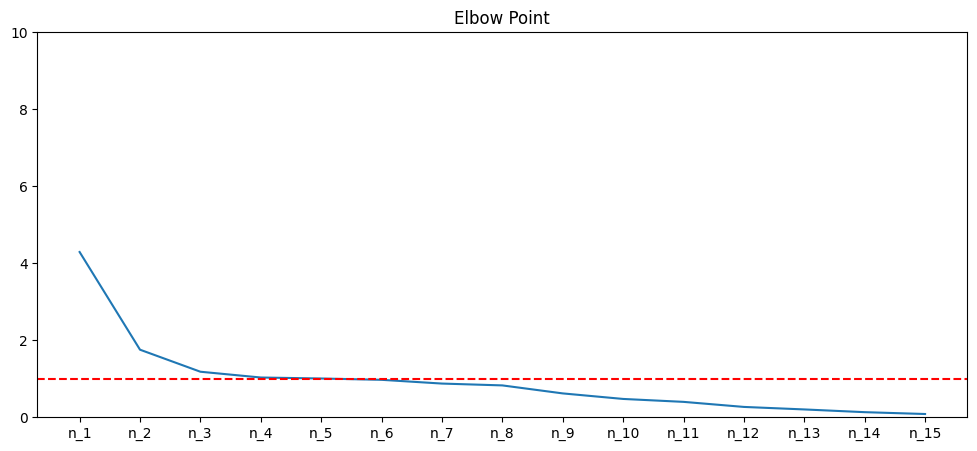

In [ ]:
# Eigen value
eigen_value = np.sort(pca.explained_variance_)[::-1]

plt.figure(figsize=(12, 5))
plt.plot(variance_ratio.keys(), eigen_value)
plt.ylim(0, 10, 1)
plt.axhline(1, color = 'red', ls = '--')
plt.title('Elbow Point')
plt.show()

In [ ]:
print(f'the number of Eigenvalue greater than one: {len(eigen_value[eigen_value > 1])}')


the number of Eigenvalue greater than one: 5


In [ ]:
pca = PCA(n_components = 8, random_state = 42)

pca.fit(data_scaled)
data_pca = pd.DataFrame(pca.transform(data_scaled),
                        columns = (["PC1", "PC2", "PC3", "PC4", "PC5", 'PC6', 'PC7', 'PC8']))

data_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2210.0,6.430251e-17,2.071895,-5.498596,-1.873599,-0.446274,1.721819,6.334672
PC2,2210.0,1.286050e-17,1.324888,-3.506164,-0.936693,-0.198363,0.779071,5.702592
PC3,2210.0,-1.607563e-17,1.087664,-3.474587,-0.785012,-0.038812,0.731120,3.620845
PC4,2210.0,-3.215126e-18,1.016332,-2.513144,-0.748993,0.019112,0.713614,3.037281
PC5,2210.0,2.330966e-17,1.003691,-2.359393,-0.781499,-0.046390,0.663317,2.674945
PC6,2210.0,6.671385e-17,0.986386,-3.198470,-0.660281,0.028983,0.740384,3.260239
PC7,2210.0,2.732857e-17,0.935698,-2.339757,-0.617699,-0.103823,0.487733,4.295538
PC8,2210.0,3.134747e-17,0.909858,-3.179878,-0.620752,-0.024914,0.580496,3.254047


In [ ]:
###########################################################################################################################

# **PHASE 2: DATA MODELING**

In [ ]:
###########################################################################################################################

In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, r2_score


import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_train_test = data_scaled

In [ ]:
features = df_train_test.drop("Response", axis=1)
labels = df_train_test["Response"]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, shuffle=True, stratify=labels)
print("X_train :", X_train.shape)
print("X_test  :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test  :", y_test.shape)

print('Original dataset shape:', Counter(y_train))

X_train : (1768, 14)
X_test  : (442, 14)
y_train : (1768,)
y_test  : (442,)
Original dataset shape: Counter({0: 1502, 1: 266})


In [ ]:
##############################################################      START FROM HERE   ##########################################################

In [ ]:
# PART 1: DIVIDE THE DATASET USING TRAIN TEST SPLIT

In [ ]:
df_train_test = data_scaled

In [ ]:
features = df_train_test.drop("Response", axis=1)
labels = df_train_test["Response"]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, shuffle=True, stratify=labels)
print("X_train :", X_train.shape)
print("X_test  :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test  :", y_test.shape)

print('Original dataset shape:', Counter(y_train))

X_train : (1768, 14)
X_test  : (442, 14)
y_train : (1768,)
y_test  : (442,)
Original dataset shape: Counter({0: 1502, 1: 266})


In [ ]:
############ USING GRID SEARCH ################

In [ ]:
# Train and Tune some hyperparameters for DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import math

In [ ]:
# Decision Tree
print('Tuning model...')
selected_model = DecisionTreeClassifier()
hyperparameters = {'max_depth': [10,20,30,40], 'criterion': ['gini', 'entropy']}
scoring = {"F1": "f1", "AUC": "roc_auc", "MSE": 'neg_mean_squared_error', "R2": "r2"}
clf = GridSearchCV(selected_model, hyperparameters, cv = 10, scoring = scoring, refit="AUC",
    n_jobs=2,
    return_train_score=True,)
clf.fit(X_train, y_train)
print('Best hyperparameters found on development set for Decision Tree: ')
print(clf.best_params_)
print(clf.best_score_)
tuned_model_DT = clf.best_estimator_

print(f'Decision Tree has maximum depth {tuned_model_DT.tree_.max_depth}.')
y_pred = tuned_model_DT.predict(X_test)
#performance evaluation of decision tree
print('Confusion matrix is: ')
print(confusion_matrix(y_test, y_pred))
print('F1_score is: ')
print(f1_score(y_test, y_pred, average='macro'))
print('Area Under the ROC Curve (AUC-ROC) is: ')
print(roc_auc_score(y_test, y_pred))
print('Root Mean Squared Error (RMSE) is: ')
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print('R2_score is: ')
print(r2_score(y_test, y_pred))


Tuning model...
Best hyperparameters found on development set for Decision Tree: 
{'criterion': 'entropy', 'max_depth': 10}
0.7335860172449576
Decision Tree has maximum depth 10.
Confusion matrix is: 
[[352  23]
 [ 42  25]]
F1_score is: 
0.675128625544185
Area Under the ROC Curve (AUC-ROC) is: 
0.6559004975124378
Root Mean Squared Error (RMSE) is: 
0.3834824944236852
R2_score is: 
-0.14348258706467698


In [ ]:
# Train and Tune some hyperparameters for RandomForestClassifier

In [ ]:
print('Tuning model...')
selected_model = RandomForestClassifier()
hyperparameters = {'max_depth': [10,20,30,40], 'criterion': ['gini', 'entropy'], 'n_estimators': [10,50,100], 'max_features': ['auto', 'sqrt', 'log2'] }
scoring = {"F1": "f1", "AUC": "roc_auc", "MSE": 'neg_mean_squared_error', "R2": "r2"}
clf = GridSearchCV(selected_model, hyperparameters, cv = 10, scoring = scoring, refit="AUC", n_jobs=2, return_train_score=True,)
model = clf.fit(X_train, y_train)
print('Best hyperparameters found on development set for Random Forest Classifier: ')
print(clf.best_params_)
tuned_model_DT = clf.best_estimator_

#performance evaluation of random forest
y_pred = tuned_model_DT.predict(X_test)
print('Confusion matrix is: ')
print(confusion_matrix(y_test, y_pred))
print('F1_score is: ')
print(f1_score(y_test, y_pred, average='macro'))
print('Area Under the ROC Curve (AUC-ROC) is: ')
print(roc_auc_score(y_test, y_pred))
print('Root Mean Squared Error (RMSE) is: ')
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print('R2_score is: ')
print(r2_score(y_test, y_pred))

#importance = tuned_model_DT.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
 #print('Feature: %0d, Score: %.5f' % (i,v))

Tuning model...
Best hyperparameters found on development set for Random Forest Classifier: 
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100}
Confusion matrix is: 
[[373   2]
 [ 47  20]]
F1_score is: 
0.6939014910607023
Area Under the ROC Curve (AUC-ROC) is: 
0.6465870646766169
Root Mean Squared Error (RMSE) is: 
0.33295604590814587
R2_score is: 
0.13799004975124352


In [ ]:
# Train and Tune some hyperparameters for Logistic Regression

In [ ]:
print('Tuning model...')
selected_model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}

clf = GridSearchCV(selected_model, param_grid=grid, cv = 10, scoring = scoring, refit="AUC", n_jobs=2, return_train_score=True,)
clf.fit(X_train, y_train)
print('Best hyperparameters found on development set for Logistic Regression: ')
print(clf.best_params_)
tuned_model_DT = clf.best_estimator_

#performance evaluation of logistic regression
y_pred = tuned_model_DT.predict(X_test)
print('Confusion matrix is: ')
print(confusion_matrix(y_test, y_pred))
print('F1_score is: ')
print(f1_score(y_test, y_pred, average='macro'))
print('Area Under the ROC Curve (AUC-ROC) is: ')
print(roc_auc_score(y_test, y_pred))
print('Root Mean Squared Error (RMSE) is: ')
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print('R2_score is: ')
print(r2_score(y_test, y_pred))

Tuning model...
Best hyperparameters found on development set for Logistic Regression: 
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Confusion matrix is: 
[[370   5]
 [ 44  23]]
F1_score is: 
0.7110532986458542
Area Under the ROC Curve (AUC-ROC) is: 
0.6649751243781095
Root Mean Squared Error (RMSE) is: 
0.33295604590814587
R2_score is: 
0.13799004975124352


In [ ]:
#PART 2: DIVIDE THE DATASET USING CROSS VALIDATION TO PREVENT OVERFITTING

In [ ]:
df_train_test = data_scaled

X = df_train_test.drop("Response", axis=1)
y = df_train_test["Response"]

In [ ]:
# Train and Tune some hyperparameters for DecisionTreeClassifier using Stratified Cross Validation

In [ ]:
# Decision Tree
print('Tuning model...')
selected_model = DecisionTreeClassifier()
hyperparameters = {'max_depth': [10,20,30,40], 'criterion': ['gini', 'entropy']}
scoring = {"F1": "f1", "AUC": "roc_auc", "MSE": 'neg_mean_squared_error', "R2": "r2"}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

clf = GridSearchCV(selected_model, hyperparameters, cv = cv, scoring = scoring, refit="AUC", n_jobs=2,return_train_score=True,)
clf.fit(X, y)
print('Best hyperparameters found on development set for Decision Tree: ')
print(clf.best_params_)
tuned_model_DT = clf.best_estimator_

print(f'Decision Tree has maximum depth {tuned_model_DT.tree_.max_depth}.')
y_pred = tuned_model_DT.predict(X)
print('Confusion matrix is: ')
print(confusion_matrix(y, y_pred))
print('F1_score is: ')
print(f1_score(y, y_pred, average='macro'))
print('Area Under the ROC Curve (AUC-ROC) is: ')
print(roc_auc_score(y, y_pred))
print('Root Mean Squared Error (RMSE) is: ')
print(math.sqrt(mean_squared_error(y, y_pred)))
print('R2_score is: ')
print(r2_score(y, y_pred))

Tuning model...
Best hyperparameters found on development set for Decision Tree: 
{'criterion': 'entropy', 'max_depth': 10}
Decision Tree has maximum depth 10.
Confusion matrix is: 
[[1846   31]
 [  60  273]]
F1_score is: 
0.9165439371624938
Area Under the ROC Curve (AUC-ROC) is: 
0.9016520516254134
Root Mean Squared Error (RMSE) is: 
0.20291986247835694
R2_score is: 
0.6782451071209727


In [ ]:
# Train and Tune some hyperparameters for RandomForestClassifier using Stratified Cross Validation

In [ ]:
print('Tuning model...')
selected_model = RandomForestClassifier()
hyperparameters = {'max_depth': [10,20,30,40], 'criterion': ['gini', 'entropy'], 'n_estimators': [10,50,100], 'max_features': ['auto', 'sqrt', 'log2'] }
scoring = {"F1": "f1", "AUC": "roc_auc", "MSE": 'neg_mean_squared_error', "R2": "r2"}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

clf = GridSearchCV(selected_model, hyperparameters, cv = cv, scoring = scoring, refit="AUC", n_jobs=2, return_train_score=True,)
clf.fit(X, y)
print('Best hyperparameters found on development set for Random Forest Classifier: ')
print(clf.best_params_)
tuned_model_DT = clf.best_estimator_

y_pred = tuned_model_DT.predict(X)
print('Confusion matrix is: ')
print(confusion_matrix(y, y_pred))
print('F1_score is: ')
print(f1_score(y, y_pred, average='macro'))
print('Area Under the ROC Curve (AUC-ROC) is: ')
print(roc_auc_score(y, y_pred))
print('Root Mean Squared Error (RMSE) is: ')
print(math.sqrt(mean_squared_error(y, y_pred)))
print('R2_score is: ')
print(r2_score(y, y_pred))

Tuning model...
Best hyperparameters found on development set for Random Forest Classifier: 
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Confusion matrix is: 
[[1876    1]
 [  78  255]]
F1_score is: 
0.9226265578058365
Area Under the ROC Curve (AUC-ROC) is: 
0.8826165003575765
Root Mean Squared Error (RMSE) is: 
0.18906772949089337
R2_score is: 
0.720674323764361


In [ ]:
# Train and Tune some hyperparameters for LogisticRegression using Stratified Cross Validation

In [ ]:
print('Tuning model...')
selected_model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalties = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver = solvers, penalty = penalties, C = c_values)
scoring = {"F1": "f1", "AUC": "roc_auc", "MSE": 'neg_mean_squared_error', "R2": "r2"}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

clf = GridSearchCV(selected_model, param_grid=grid, cv = cv, scoring = scoring, refit="AUC", n_jobs=2, return_train_score=True,)
clf.fit(X, y)
print('Best hyperparameters found on development set for Logistic Regression: ')
print(clf.best_params_)
tuned_model_DT = clf.best_estimator_

y_pred = tuned_model_DT.predict(X)
print('Confusion matrix is: ')
print(confusion_matrix(y, y_pred))
print('F1_score is: ')
print(f1_score(y, y_pred, average='macro'))
print('Area Under the ROC Curve (AUC-ROC) is: ')
print(roc_auc_score(y, y_pred))
print('Root Mean Squared Error (RMSE) is: ')
print(math.sqrt(mean_squared_error(y, y_pred)))
print('R2_score is: ')
print(r2_score(y, y_pred))

Tuning model...
Best hyperparameters found on development set for Logistic Regression: 
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Confusion matrix is: 
[[1833   44]
 [ 199  134]]
F1_score is: 
0.7311488015763712
Area Under the ROC Curve (AUC-ROC) is: 
0.6894803700877223
Root Mean Squared Error (RMSE) is: 
0.3315942567826254
R2_score is: 
0.140808362971389
